In [1]:
# import libraries
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
# read the data file
df = pd.read_csv('iris.csv', header=None)
df.columns = ['sepal length','sepal width','petal length','petal width', 'species']
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# split the data into features and target
X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

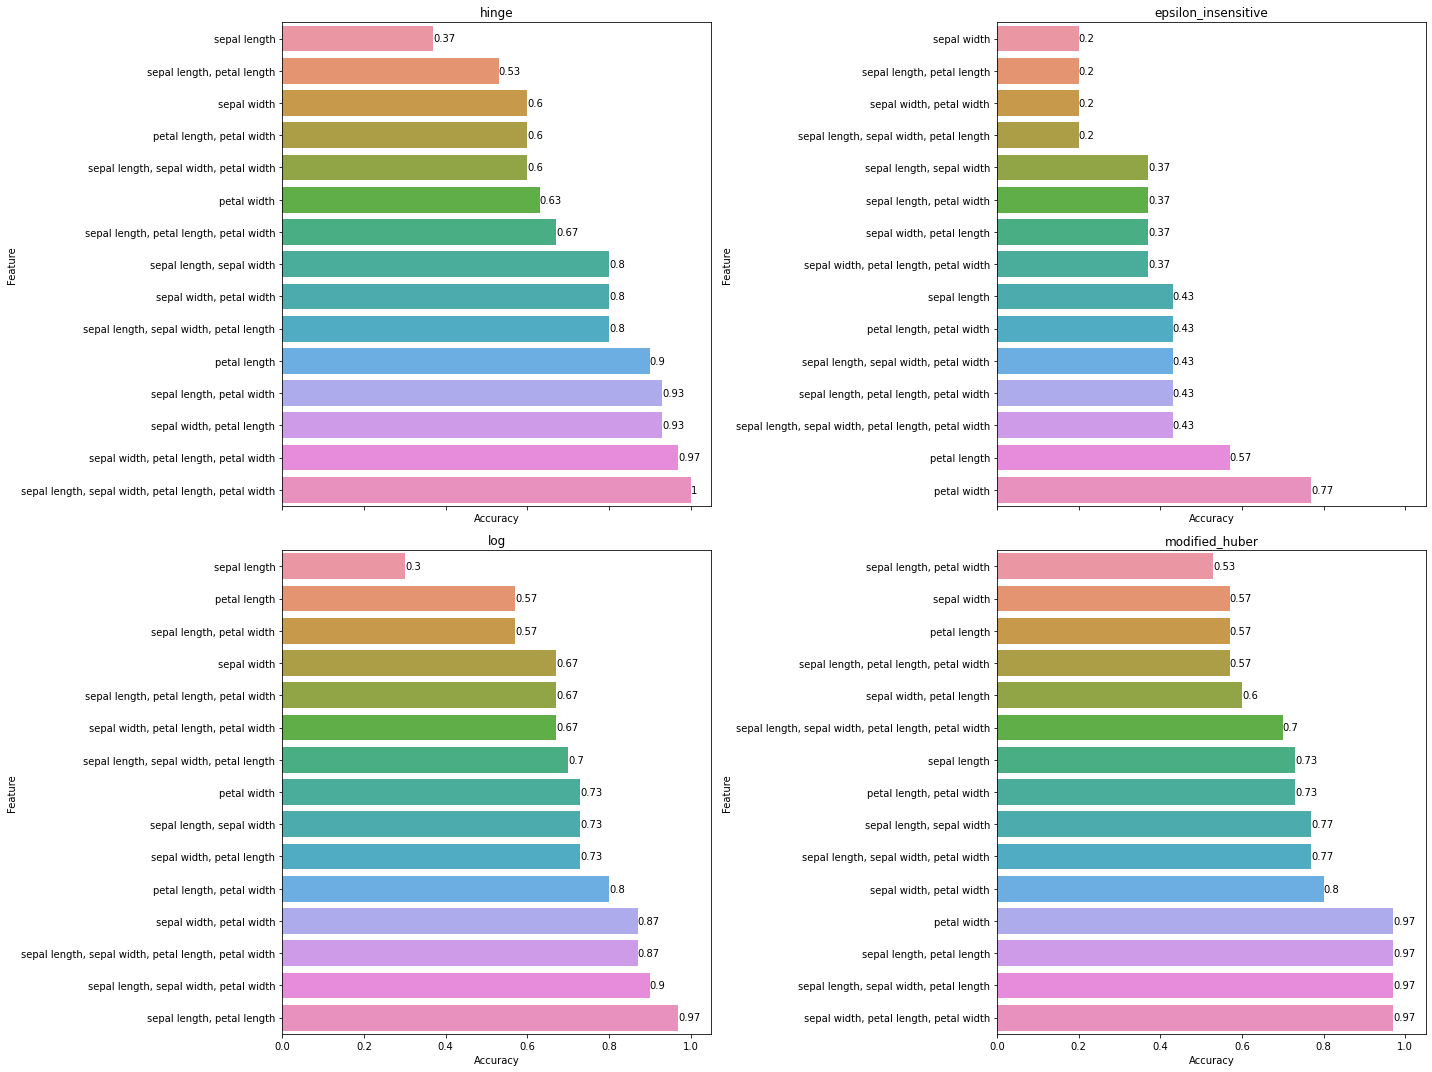

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(20, 15), sharex=True)
axs = axs.reshape(-1)

# for each loss function develop 15 models
for loss, ax in zip(['hinge', 'epsilon_insensitive', 'log', 'modified_huber'], axs):
    accs = {}
    # first lets build models for each individual column
    for column in X_train:
        x_train = X_train[[column]]
        x_test = X_test[[column]]
        # build the model using training data
        sgd = SGDClassifier(loss=loss, random_state=0).fit(x_train, y_train)
        # append the accuracy of testing data
        accs[column] = round(sgd.score(x_test, y_test), 2)

    # now lets build models for each 2 column combinations
    for columns in list(itertools.combinations(X_train.columns, 2)):
        columns = list(columns)
        x_train = X_train[columns]
        x_test = X_test[columns]
        # build the model using training data
        sgd = SGDClassifier(loss=loss, random_state=0).fit(x_train, y_train)
        # append the accuracy of testing data
        accs[', '.join(columns)] =  round(sgd.score(x_test, y_test), 2)

    # now lets build models for each 3 column combinations
    for columns in list(itertools.combinations(X_train.columns, 3)):
        columns = list(columns)
        x_train = X_train[columns]
        x_test = X_test[columns]
        # build the model using training data
        sgd = SGDClassifier(loss=loss, random_state=0).fit(x_train, y_train)
        # append the accuracy of testing data
        accs[', '.join(columns)] =  round(sgd.score(x_test, y_test), 2)

    # build model using all features
    sgd = SGDClassifier(loss=loss, random_state=0).fit(X_train, y_train)
    accs[', '.join(X_train.columns)] = round(sgd.score(X_test, y_test), 2)
    
    # make dataframe of accuracies
    acc_df = pd.DataFrame(zip(accs.keys(), accs.values()), columns=['Feature','Accuracy']).sort_values('Accuracy')
    # plot the accuracies
    sns.barplot(data=acc_df, y='Feature', x='Accuracy', ax=ax)
    ax.bar_label(ax.containers[0])
    ax.set_title(loss)
fig.tight_layout()
plt.show()

### Conclusion:
- Apart from `loss=epsilon_insensitive`, all the models perform well with more features.
- When including only feature, for `loss=modified_huber` has the highest accuracy of **0.97**. And that feature is `petal width`.
- When including only 2 features, for `loss=modified_huber & log` has the highest accuracy of **0.97**. For both the losses features are the same i.e., `sepal length` and `petal length`.
- When including 3 features, for `loss=modified_huber & hinge` has the highest accuracy of **0.97**. Features are in this case are [`sepal width`, `petal length`, `petal width`], [`sepal length`, `sepal width`, `petal length`], and [`sepal length`, `petal width`, `petal length`]

- When including all features, for `loss=hinge` model gets perfect accuracy of **1**.